In [1]:
import numpy as np

import pandas as pd

import seaborn as sns


In [2]:
df = pd.read_csv("C:/Users/7kingdom/Documents/인공지능개론/src/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# 결측치 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# 결측치 제거
df_delete = df.dropna()
df_delete.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df_delete

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


---
결측치가 있기 때문에 dropna로 결측치가 있는 열을 전부 지워버렸다. <br> -> 데이터에 쓸 수 있는 부분이 얼마 남지 않아서 의미가 없다.
--

---
일단 데이터를 한 번 분석을 해본다.

필요없는 행 : PassengerId, Name, SibSp, Parch, Ticket<br>
유의미한 행 : Survived, Pclass, Sex, Aage, Fare, Cabin, Embarked<br>


In [6]:
# 필요없는 열 제거
columns_to_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket']
df_2 = df.drop(columns_to_drop, axis=1)

그리고 결측치를 확인해 본다.

In [10]:
# 결측치 확인
df_2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Cabin       687
Embarked      2
dtype: int64

'Age'와 'Cabin' 그리고 'Embarked'에 결측치가 있다.<br>
일단 'Age'부터 해결하자면 그냥 열을 삭제하기에는 데이터의 양이 많고 해당 데이터형이 연속형이라 결측값을 평균값으로 대체할 것이다.


In [12]:
age_mean = df_2['Age'].mean()  # Age 열의 평균값 계산
df_2['Age'].fillna(age_mean, inplace=True)  # 결측값을 평균값으로 대체

In [13]:
df_2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Cabin       687
Embarked      2
dtype: int64

'Cabin'은 데이터형이 범주형이고 너무 많은 결측치가 있어 데이터를 쓰기 어렵다. 과감하게 삭제한다.

In [19]:
df_3 = df.drop('Cabin', axis=1)

In [21]:
df_3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

마지막으로 남은건 몇개 안되니까 그냥 삭제한다.

In [22]:
df_4 = df.dropna()

In [23]:
df_4.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

이러면 일단 결측치는 전부 제거가 되었다. 그런데 결측치만 제거하면 이쁜 데이터셋이 나오나? 그건 아니다.<br>
데이터 중에서는 혼자 이상한데로 가서 평균이나 이런 것들을 망치는 아웃라이어가 존재한다.<br>
해당 아웃라이어도 관리를 해야한다.

이번엔 아웃라이어를 보자. 너무 튀는 데이터는 있으니만 못하기 때문에(평균 및 수치 데이터를 오염 시킴) 삭제한다.

In [18]:
import seaborn as sns

import matplotlib.pyplot as plt

C:\Users\7kingdom\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


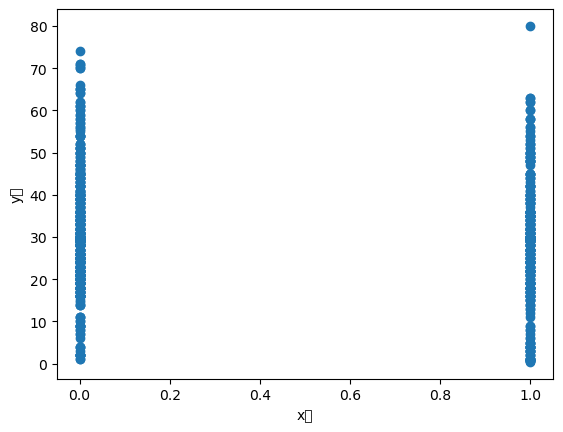

In [17]:
plt.scatter(df['Survived'], df['Age'])
plt.xlabel('x축')
plt.ylabel('y축')
plt.show()

위 데이터를 보면 1이 뭘 의미하는 지는 모르겠지만 아무튼 80세 한 분이 동떨어져있다. <br>
이는 (1을 생존으로 가정하면) 생존자 평균 나이 같은 값들을 오염시키기 때문에 아웃라이어 생각하고 삭제해야한다.<br><br>
'삭제는 다음 시간에 배운다고 한다'

그런데 아웃라이어를 보기 힘들지 않은가? 만약 y값이 너무 커서 그래프 상으로는 작아 보여도 실제로는 큰 수치의 차이가 날 수도 있다.<br>
이런 문제를 해결하기 위해 박스 플롯이란게 존재한다.

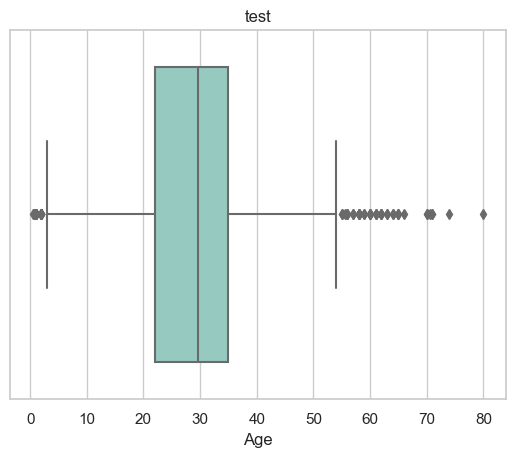

In [25]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Age", data=df, palette="Set3")
plt.title("test")
plt.show()

해당 박스 플롯은 수치적으로 아웃라이어를 한눈에 볼 수 있다. 사실상 저 선을 넘어가면 다 아웃라이어다.

다음은 데이터 스케일링을 해야한다. 다음 시간에...